### Q1. Probability practice

In [2]:
#Part A:
#what we know
P_RC = .3
P_TC = .7
P_YgivenRC = .5
P_NgivenRC = .5
P_Y = .65
P_N = .35
#want to find P(Y|TC) with total probability equation:
#P_Y = (P_YgivenRC * P_RC) + (P_YgivenTC * P_TC)
#change equation for what we want to solve for
P_YgivenTC = (P_Y - P_YgivenRC * P_RC) / P_TC
P_YgivenTC *= 100
print("Part A: ", f"{P_YgivenTC:.2f}" + "% are truthful clickers and answered yes")

##################

#Part B:
#what we know
sensitivity = 0.99
specificity = 0.9999
prevalence = 0.000025
#probabilities
P_No_Disease = 1 - prevalence
P_Positive_given_No_Disease = 1 - specificity
#find total probability of testing positive
P_Positive = (sensitivity * prevalence) + (P_Positive_given_No_Disease * P_No_Disease)
#find the probability of having the disease given a positive test
P_Disease_given_Positive = (sensitivity * prevalence) / P_Positive
print("Part B: ",f"Probability of having the disease given a positive test result: {P_Disease_given_Positive:.4f}")


Part A:  71.43% are truthful clickers and answered yes
Part B:  Probability of having the disease given a positive test result: 0.1984


### Q2. Wrangling the Billboard Top 100

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


billboard = pd.read_csv("billboard.csv")
#print(billboard.head(6))

##################

#Part A:
sorted_songs = pd.DataFrame(billboard.groupby(['performer', 'song'])['weeks_on_chart'].agg('sum').sort_values(ascending=False).iloc[:10])
sorted_songs


,,weeks_on_chart
performer,song,
Imagine Dragons,Radioactive,3828
AWOLNATION,Sail,3160
Jason Mraz,I'm Yours,2926
The Weeknd,Blinding Lights,2926
LeAnn Rimes,How Do I Live,2415
OneRepublic,Counting Stars,2346
LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,2346
Adele,Rolling In The Deep,2145
Jewel,Foolish Games/You Were Meant For Me,2145


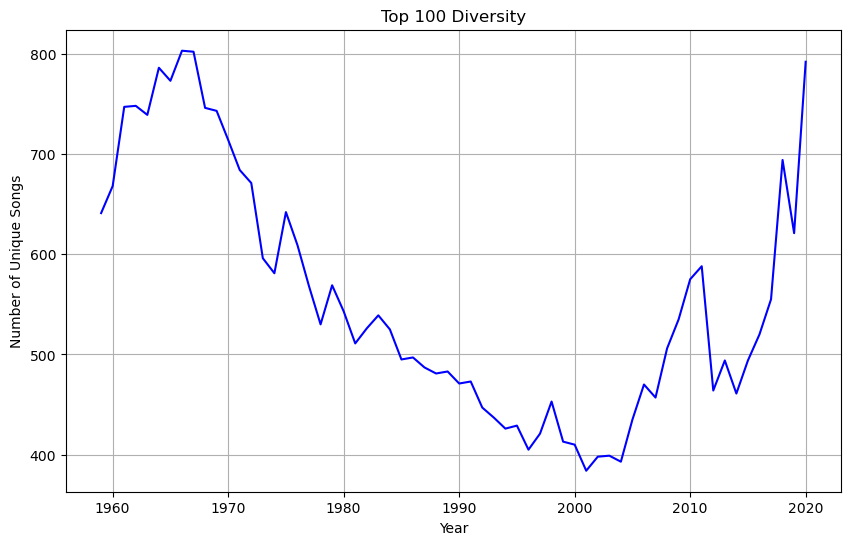

In [5]:
##################

#Part B:

completeData = billboard[(billboard['year'] > 1958) & (billboard['year'] < 2021)]

countPerYear = completeData.groupby(['year', 'performer', 'song']).size().reset_index(name='count').sort_values(by=['year', 'count'], ascending=[True, False])

uniqueTopSongs = countPerYear.groupby('year')['song'].nunique().reset_index(name='uniqueSong')

plt.figure(figsize=(10, 6))
plt.plot(uniqueTopSongs['year'], uniqueTopSongs['uniqueSong'], color='blue')
plt.title('Top 100 Diversity')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.grid()
plt.show()

##Comments: 
#Highest number of unique songs in a year peaked in the 60's then saw steady decline till 2001, from which it started to see a overall rise again till 2020, which a significant dip in 2012.
# This shows that music diversity (many songs topping the charts) was very high in the 60's and late 2010's, but 90's till 2000 roughly 400-500 songs were dominating the market as weekly top 100's
# This also corresponds to a Radio Era where people would 

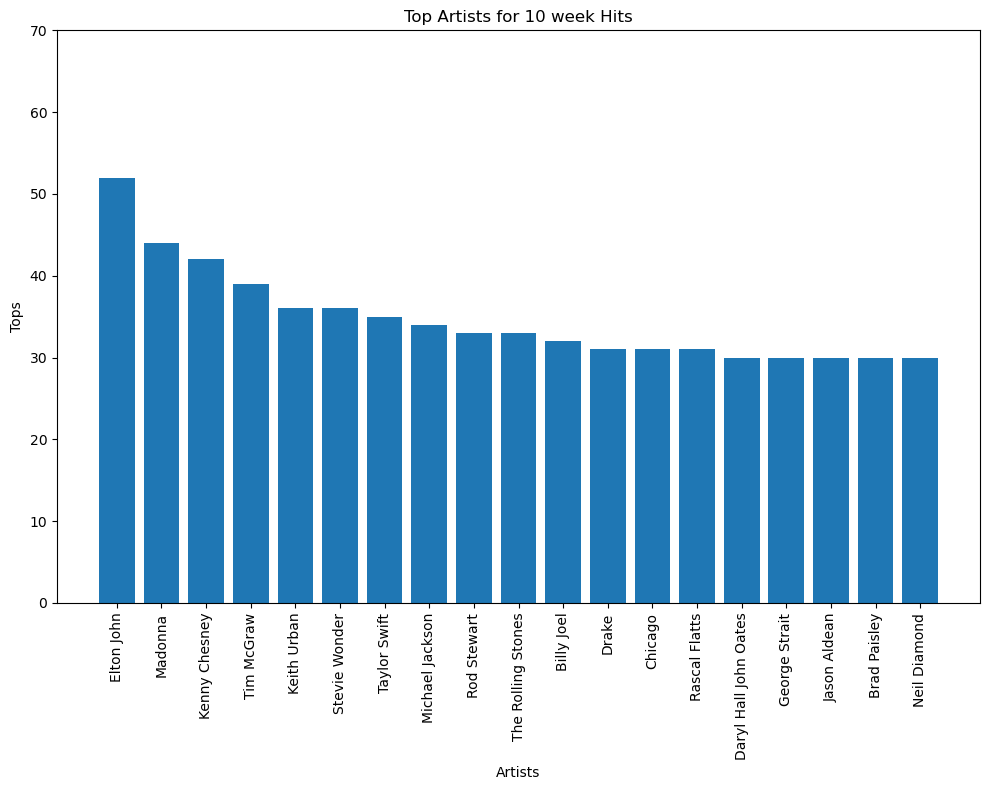

In [6]:
##################

#Part C:

song_weeks = billboard.groupby(['performer', 'song']).size().reset_index(name='weeks_on_chart')

ten_week_hits = song_weeks[song_weeks['weeks_on_chart'] >= 10]

artist_hits = ten_week_hits.groupby('performer').size().reset_index(name='ten_week_hits_count')

top_artists = artist_hits[artist_hits['ten_week_hits_count'] >= 30]

top_artists = top_artists.sort_values('ten_week_hits_count', ascending=False)
top_artists

plt.figure(figsize=(10, 8))
plt.bar(top_artists['performer'], top_artists['ten_week_hits_count'])
plt.title('Top Artists for 10 week Hits')
plt.xlabel('Artists')
plt.ylabel('Tops')
plt.xticks(rotation=90, fontsize=10)
plt.ylim(0,70)
plt.tight_layout()
plt.show()


### Q3: Visual story telling part 1: green buildings

<Figure size 1000x700 with 0 Axes>

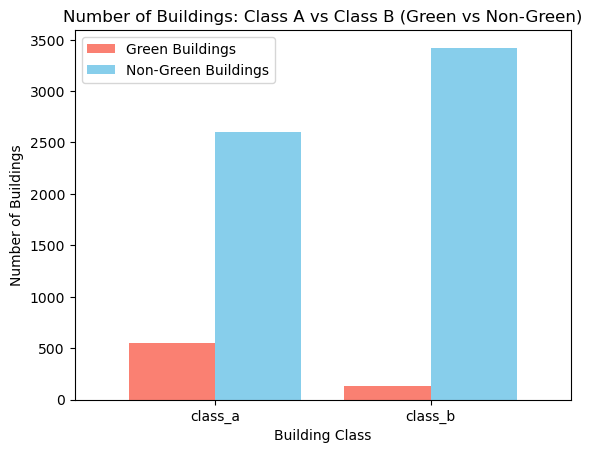

<Figure size 1000x700 with 0 Axes>

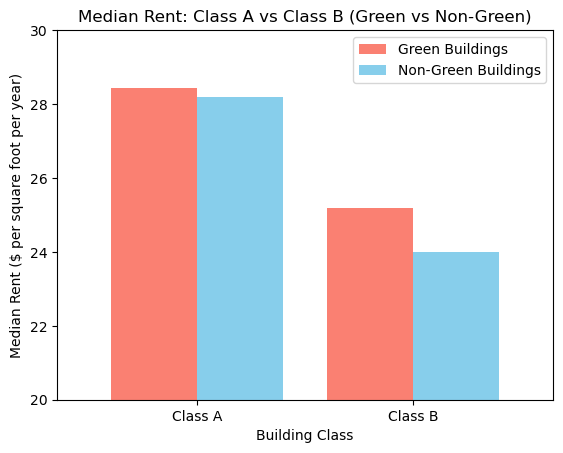


Benefit of green building in Class A: $ 0.24
Benefit of green building in Class B: $ 1.2


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'greenbuildings.csv'
df = pd.read_csv(file_path)


# Filter out buildings with very low occupancy rates (less than 10%)
df_filtered = df[df['leasing_rate'] >= 0.1]
df = df_filtered

#############

#Class-wise breakdown of green buildings
green_buildings = df[df['green_rating'] == 1]
non_green_buildings = df[df['green_rating'] == 0]

# Calculate the counts of Class A and Class B buildings for both green and non-green
class_counts_green = green_buildings[['class_a', 'class_b']].sum()
class_counts_non_green = non_green_buildings[['class_a', 'class_b']].sum()

# Combine the counts into a single DataFrame for plotting
class_counts_combined = pd.DataFrame({
    'Green Buildings': class_counts_green,
    'Non-Green Buildings': class_counts_non_green
})

# Plotting the combined counts
plt.figure(figsize=(10, 7))
class_counts_combined.plot(kind='bar', color=['salmon', 'skyblue'], width=0.8)
plt.title('Number of Buildings: Class A vs Class B (Green vs Non-Green)')
plt.xlabel('Building Class')
plt.ylabel('Number of Buildings')
plt.xticks(rotation=0)
plt.show()

###################

#Rent differences in these classes

# Filter for green and non-green buildings
green_buildings = df[df['green_rating'] == 1]
non_green_buildings = df[df['green_rating'] == 0]

# Calculate the median rent for Class A and Class B buildings for both green and non-green
median_rent_class_a_green = green_buildings[green_buildings['class_a'] == 1]['Rent'].median()
median_rent_class_b_green = green_buildings[green_buildings['class_b'] == 1]['Rent'].median()

median_rent_class_a_non_green = non_green_buildings[non_green_buildings['class_a'] == 1]['Rent'].median()
median_rent_class_b_non_green = non_green_buildings[non_green_buildings['class_b'] == 1]['Rent'].median()

# Combine the median rents into a single DataFrame for plotting
rent_diff_combined = pd.DataFrame({
    'Green Buildings': [median_rent_class_a_green, median_rent_class_b_green],
    'Non-Green Buildings': [median_rent_class_a_non_green, median_rent_class_b_non_green]
}, index=['Class A', 'Class B'])

# Plotting the rent differences
plt.figure(figsize=(10, 7))
rent_diff_combined.plot(kind='bar', color=['salmon', 'skyblue'], width=0.8)
plt.title('Median Rent: Class A vs Class B (Green vs Non-Green)')
plt.xlabel('Building Class')
plt.ylabel('Median Rent ($ per square foot per year)')
plt.xticks(rotation=0)
plt.ylim(20, 30)   #<- doing this to show the difference in median value
plt.show()

print("\nBenefit of green building in Class A: $", np.round(median_rent_class_a_green-median_rent_class_a_non_green,2))
print("Benefit of green building in Class B: $", np.round(median_rent_class_b_green-median_rent_class_b_non_green,2))


### Q3: Visual story telling part 2: Capital Metro data

Please refer to the excel file under: "https://github.com/m-ibrahim908/STA-S380---Intro-to-Machine-Learning/tree/main/problem2_visual_st_cap_metro.xlsm"

### Q4: Clustering and dimensionality reduction

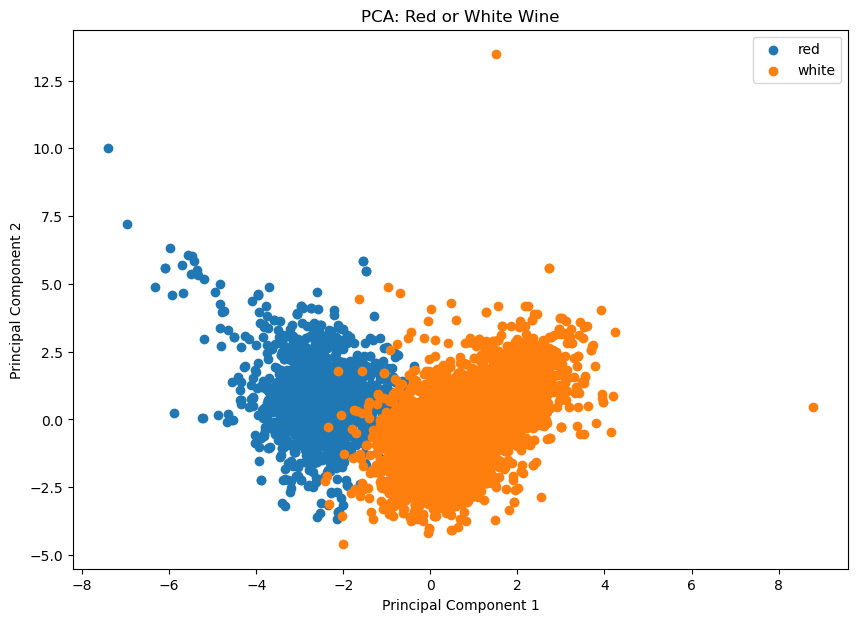

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('wine.csv')
data

###############
#chemical properties were standardized using StandardScaler to ensure all features have equal variance

chemical_properties = data.iloc[:, :-2]  
scaler = StandardScaler()
chemical_properties_standardized = scaler.fit_transform(chemical_properties)

###############
#Run PCA

pca = PCA()
pca_components = pca.fit_transform(chemical_properties_standardized)
explained_variance = pca.explained_variance_ratio_
explained_variance

###############
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
for wine_type in data['color'].unique():
    subset = data[data['color'] == wine_type]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=wine_type)

plt.title('PCA: Red or White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#distinct clusters for red and white wines with a bit of overlap

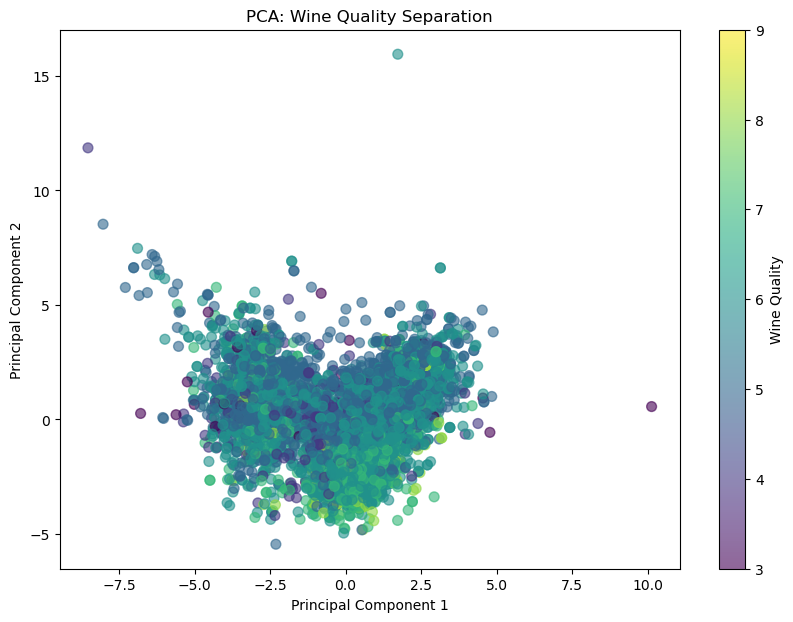

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

chemical_properties = data.drop(columns=['color', 'quality'])  # Exclude non-numeric 'color' column
scaler = StandardScaler()
chemical_properties_standardized = scaler.fit_transform(chemical_properties)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(chemical_properties_standardized)

data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 7))
sc = plt.scatter(data['PCA1'], data['PCA2'], c=data['quality'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(sc, label='Wine Quality')
plt.title('PCA: Wine Quality Separation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
#no clear separation for quality via pca


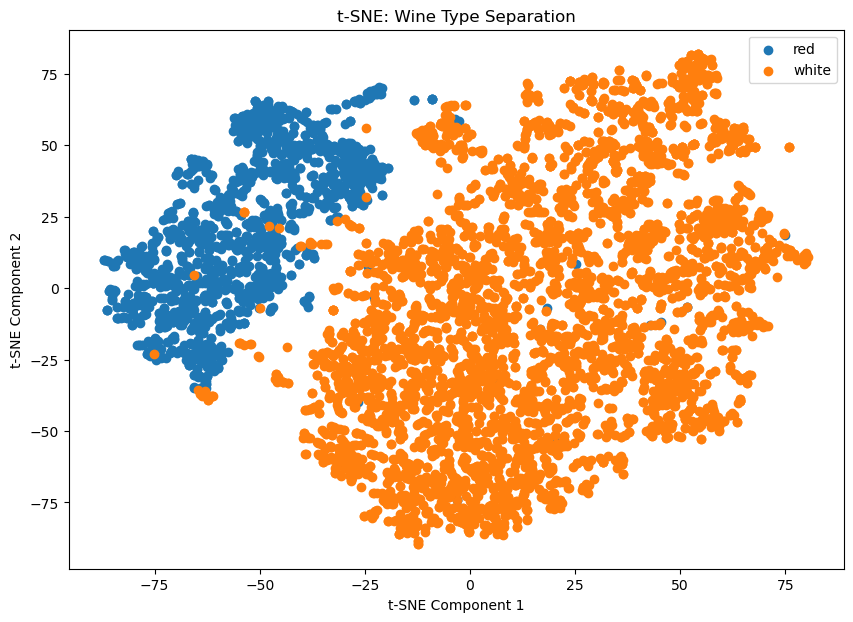

In [14]:
from sklearn.manifold import TSNE

# Trying TSNE now

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(chemical_properties_standardized)

data['TSNE1'] = tsne_components[:, 0]
data['TSNE2'] = tsne_components[:, 1]

plt.figure(figsize=(10, 7))
for wine_type in data['color'].unique():
    subset = data[data['color'] == wine_type]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=wine_type)

plt.title('t-SNE: Wine Type Separation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
#extremely distinct clusters for red/white wines, even better than PCA

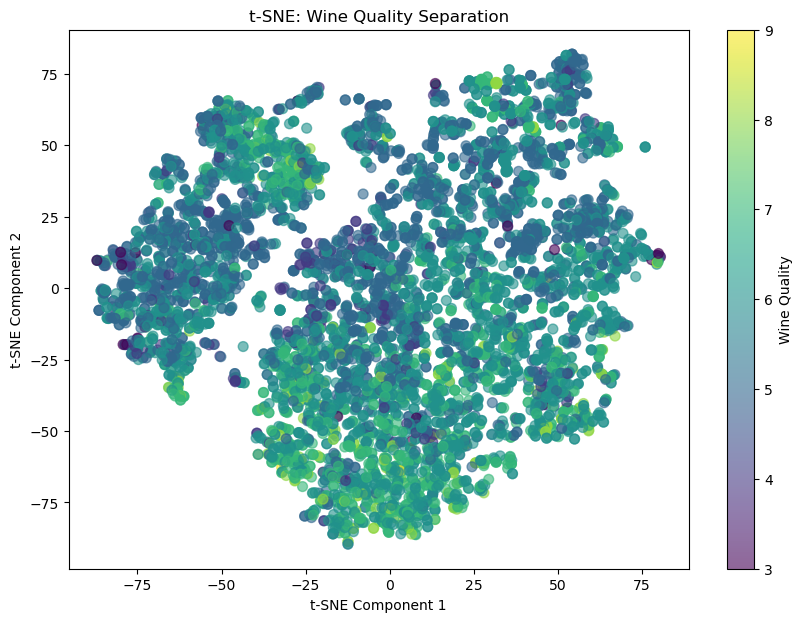

In [15]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(chemical_properties_standardized)

data['TSNE1'] = tsne_components[:, 0]
data['TSNE2'] = tsne_components[:, 1]

plt.figure(figsize=(10, 7))
sc = plt.scatter(data['TSNE1'], data['TSNE2'], c=data['quality'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(sc, label='Wine Quality')
plt.title('t-SNE: Wine Quality Separation')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
#for quality, slightly better than PCA but still lacking true separation 

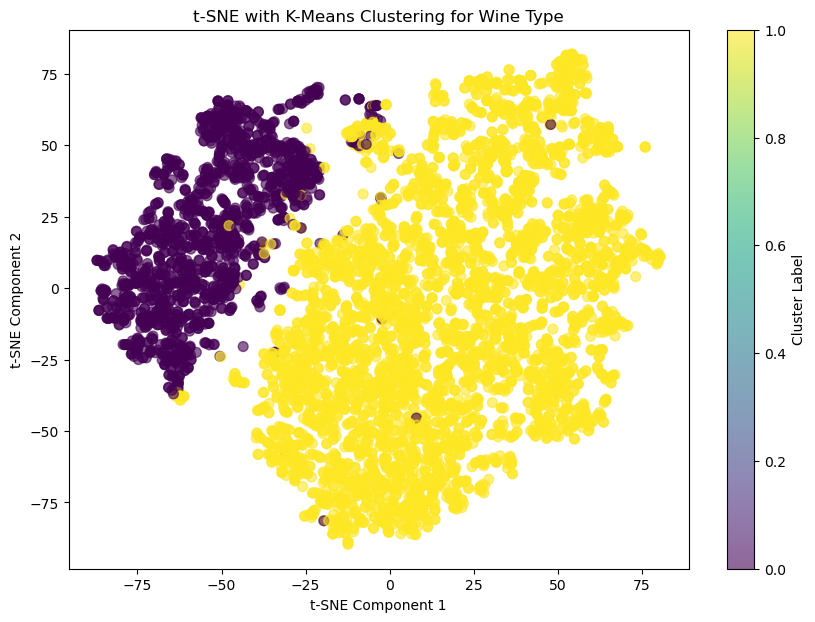

In [16]:
from sklearn.cluster import KMeans

#Trying K-Means now

kmeans = KMeans(n_clusters=2, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(chemical_properties_standardized)

plt.figure(figsize=(10, 7))
plt.scatter(data['TSNE1'], data['TSNE2'], c=data['KMeans_Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('t-SNE with K-Means Clustering for Wine Type')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

data['Actual_Label'] = data['color'].map({'red': 0, 'white': 1})

#tsne used solely to visualize K-means . Again, distinct clusters from K-means. 


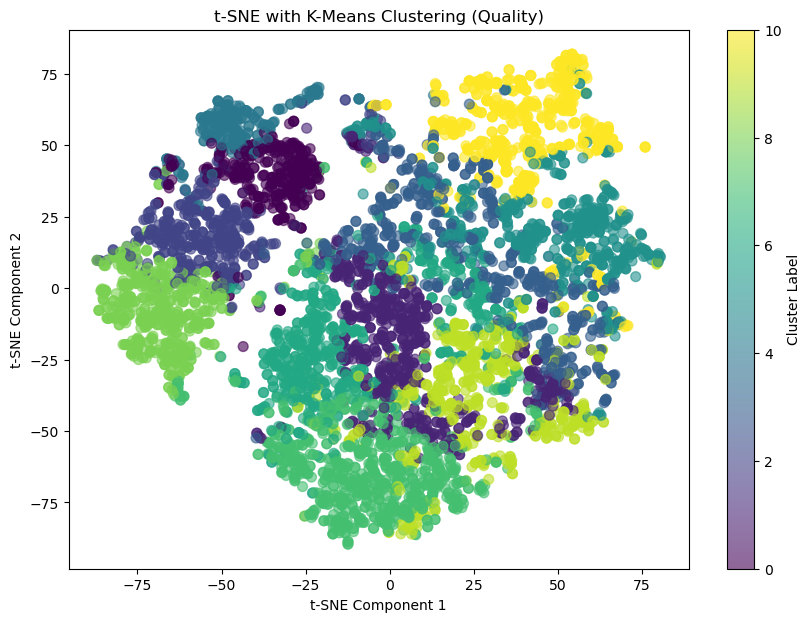

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

k = 11
kmeans_quality = KMeans(n_clusters=k, random_state=42)
data['KMeans_Cluster_Quality'] = kmeans_quality.fit_predict(chemical_properties_standardized)

# visualize K-means clusters using t-SNE
plt.figure(figsize=(10, 7))
plt.scatter(data['TSNE1'], data['TSNE2'], c=data['KMeans_Cluster_Quality'], cmap='viridis', s=50, alpha=0.6)
plt.title('t-SNE with K-Means Clustering (Quality)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


data['Quality_Category'] = pd.cut(data['quality'], bins=k, labels=False)
#quality is a lot harder to sort of cluster compared to type of wine

### Q5: Market segmentation

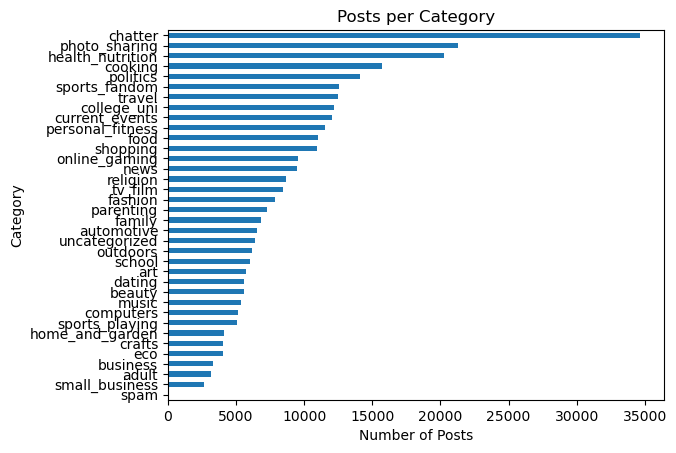

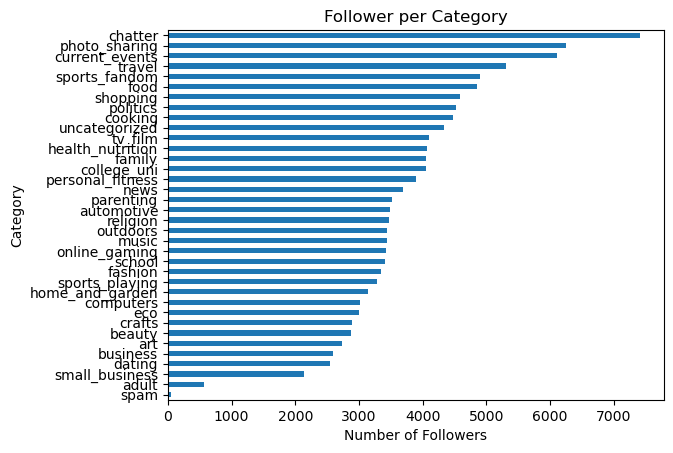

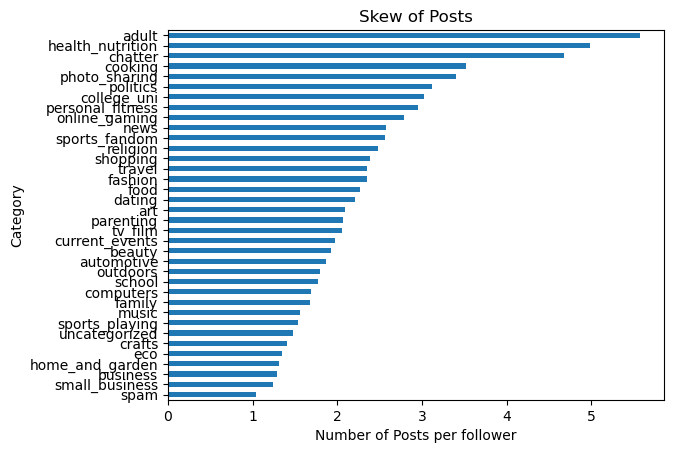

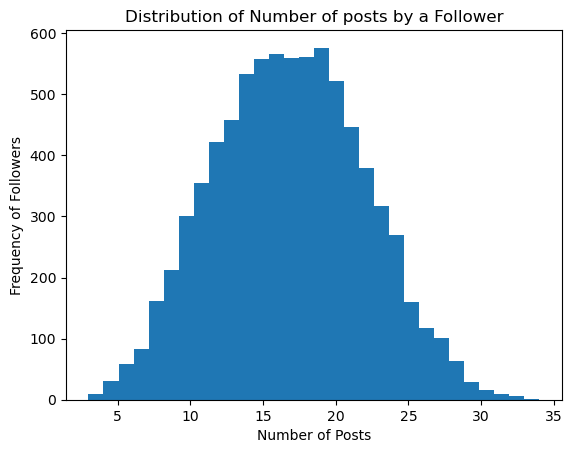

<Figure size 640x480 with 0 Axes>

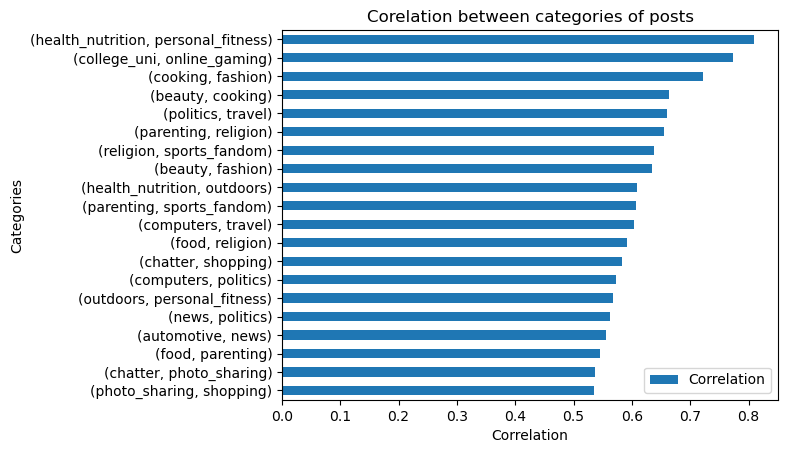

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("social_marketing.csv", index_col=[0])
df.shape
df.head()

# #### EDA

# Posts per category
plt.figure()
df.sum().sort_values().plot(kind = 'barh')
plt.xlabel("Number of Posts")
plt.ylabel("Category")
plt.title("Posts per Category")
plt.show()

#Posts per follower
plt.figure()
(df != 0).sum().sort_values().plot(kind = 'barh')
plt.xlabel("Number of Followers")
plt.ylabel("Category")
plt.title("Follower per Category")
plt.show()

#Skewed Posts
plt.figure()
(df.sum()/(df != 0).sum()).sort_values().plot(kind = 'barh')
plt.xlabel("Number of Posts per follower")
plt.ylabel("Category")
plt.title("Skew of Posts")
plt.show()

#Distribution of number of posts by a follower
non_zero_counts = (df != 0).sum(axis=1)
plt.figure()
non_zero_counts.plot(kind = 'hist', bins = 30)
plt.title("Distribution of Number of posts by a Follower")
plt.xlabel("Number of Posts")
plt.ylabel("Frequency of Followers")

#Corelation amoung categories
corr_matrix = df.corr()
corr_long = corr_matrix.stack().reset_index()
corr_long.columns = ['Category1', 'Category2', 'Correlation']

# Remove duplicate pairs (e.g., (A, B) and (B, A))
corr_long = corr_long[corr_long['Category1'] < corr_long['Category2']]

top_relationships = corr_long.reindex(corr_long['Correlation'].abs().sort_values(ascending=False).index).head(20).sort_values(by = 'Correlation')
top_relationships['Categories_Concat'] = "("+top_relationships['Category1']+', '+top_relationships['Category2']+")"
top_relationships.drop(['Category1','Category2'],axis = 1, inplace = True)
top_relationships.set_index('Categories_Concat', inplace = True)

plt.figure()
top_relationships.plot(kind = 'barh')
plt.xlabel("Correlation")
plt.ylabel("Categories")
plt.title("Corelation between categories of posts")
plt.show()


#Summary:

#We see that the largest class is "chatter"
#We can see from the first three graphs that categories such has "health nutrition" have more posts than followers, i.e. followers are less but frequently post. 
#The mean number of posts is somewhere between 10-25 of followers. There is no big skew in overall number of posts by followers.
#We can see high corelation of categories in (health_nutrition, personal_fitness) and (college_uni, online_gaming) and other pairs from the corelation plot.



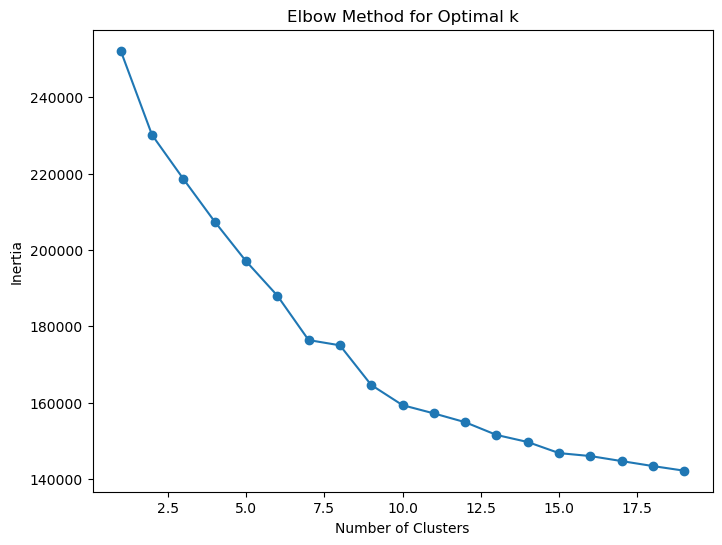

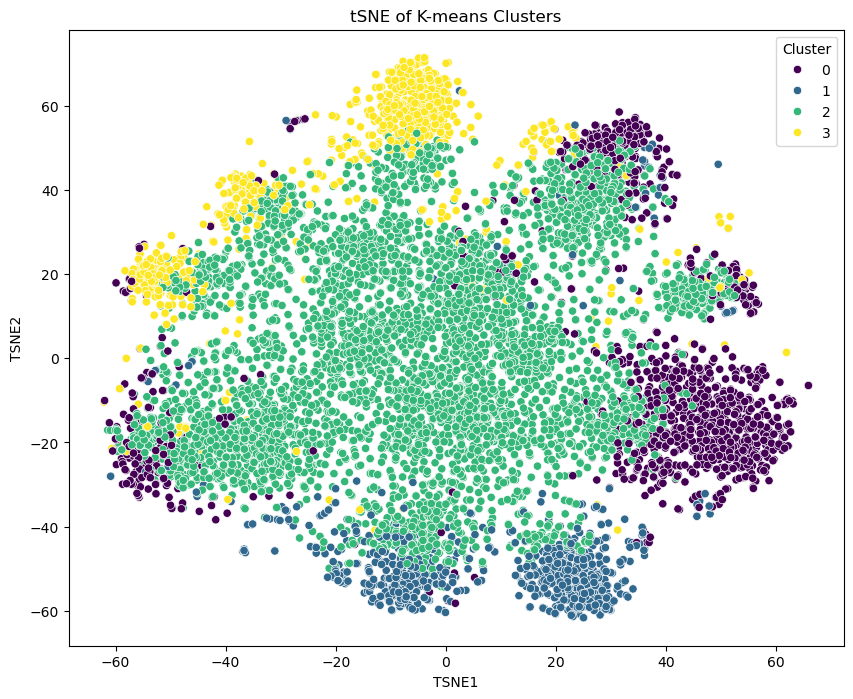

In [20]:
#Clusters
#remove spam and chatter from clsuters

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

df_cluster = df.drop(['chatter','spam', 'adult', 'uncategorized'],axis = 1, inplace = False)
df_cluster = df_cluster.fillna(0)  # Handle missing values, if any

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Determine the number of clusters using the Elbow Method
inertia = []
for k in range(1, 20):  # Test from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
##### Pick 4 clusters for better explainability

# Choose the number of clusters (e.g., from the Elbow Method)
k = 4  # Replace with the optimal number of clusters

# Fit the K-means model
kmeans = KMeans(n_clusters=k, random_state=0)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the results
cluster_summary = df_cluster.groupby('Cluster').mean()
cluster_summary.to_csv('cluster_summary.csv')
cluster_summary.shape
#print(cluster_summary.T)

# Plot the clusters (optional, if you have reduced dimensions)
# For visualization, you might want to use PCA to reduce dimensions
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# df_pca = pca.fit_transform(df_scaled)
# df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'], index=df_cluster.index)
# df_pca['Cluster'] = df_cluster['Cluster']

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne, columns=['TSNE1', 'TSNE2'], index=df.index)  # Use original index

# Add cluster labels to t-SNE DataFrame
df_tsne['Cluster'] = df_cluster['Cluster']


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis')
plt.title('tSNE of K-means Clusters')
plt.show()


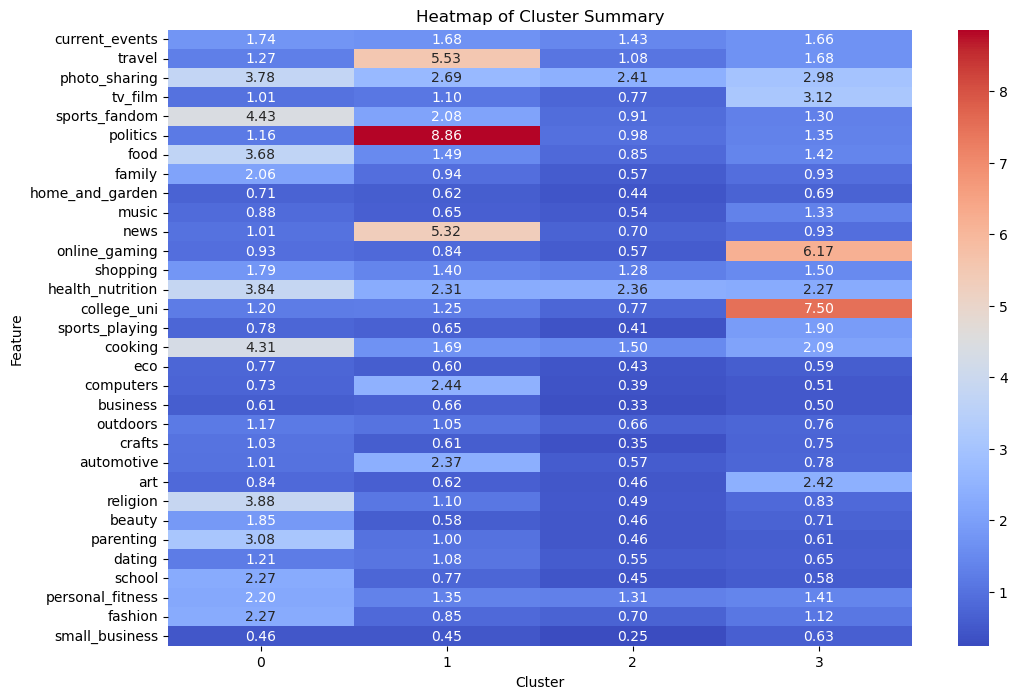

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Cluster Summary')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()

### Q6: The Reuters Corpus

In [37]:
import nltk
import random
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import reuters, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Initialize an empty list to store the training data
train_data_list = []
test_data_list = []

#Taking all data, however files are kept in two separate folders
train_data = '/Users/ibrahim-mac/downloads/STA380-master/data/ReutersC50/C50train'
test_data = '/Users/ibrahim-mac/downloads/STA380-master/data/ReutersC50/C50test'

# Function to clean and preprocess text
def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    tokens = text.split()
    cleaned_text = ' '.join([word for word in tokens if word not in stop_words])
    return cleaned_text

# Function to collect data
def collect_data(data_dir, data_list, dataset_type):
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                folder_name = os.path.basename(root)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read()
                    cleaned_text = clean_text(text)  # Clean the text
                    data_list.append([folder_name, file, cleaned_text, dataset_type])

# Collect training data
collect_data(train_data, train_data_list, 'train')

# Collect test data
collect_data(test_data, test_data_list, 'test')

# Combine both lists into a single DataFrame
all_data = train_data_list + test_data_list
df = pd.DataFrame(all_data, columns=['Folder', 'File', 'Content', 'Dataset'])

# Group by author and concatenate all text in files
all_data_text = df[df['Dataset'] == 'train'].groupby('Folder')['Content'].apply(lambda texts: ' '.join(texts)).reset_index()
print(all_data_text.head())


[nltk_data] Downloading package stopwords to /Users/ibrahim-
[nltk_data]     mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            Folder                                            Content
0    AaronPressman  group leading trademark specialists plans rele...
1       AlanCrosby  third seed boris becker fresh first title sinc...
2   AlexanderSmith  following bumper year yet british companies li...
3  BenjaminKangLim  american movies hamburgers jeans us bashing ra...
4    BernardHickey  water filtration company memtec ltd confident ...


Explained Variance Ratio of PCs: [0.14406119 0.0792044  0.07275625 0.06041139 0.05274631]


Principal Components (PCs):

Principal Component 1 - Top Contributing Features:
china      0.334521
hong       0.332305
chinese    0.320344
kong       0.263451
beijing    0.255229
chinas     0.223148
wang       0.163908
tung       0.103899
kongs      0.099576
taiwan     0.083718
Name: 0, dtype: float64

Principal Component 2 - Top Contributing Features:
czech        0.470809
prague       0.205491
klaus        0.184432
crowns       0.149294
senate       0.115565
gm           0.111785
coalition    0.101366
crown        0.084170
toronto      0.080261
brex         0.075241
Name: 1, dtype: float64

Principal Component 3 - Top Contributing Features:
internet     0.218602
software     0.216860
computer     0.199772
microsoft    0.187853
corp         0.147995
apple        0.143264
inc          0.138663
said         0.137756
quarter      0.135377
online       0.123593
Name: 2, dtype: float64

Principal C

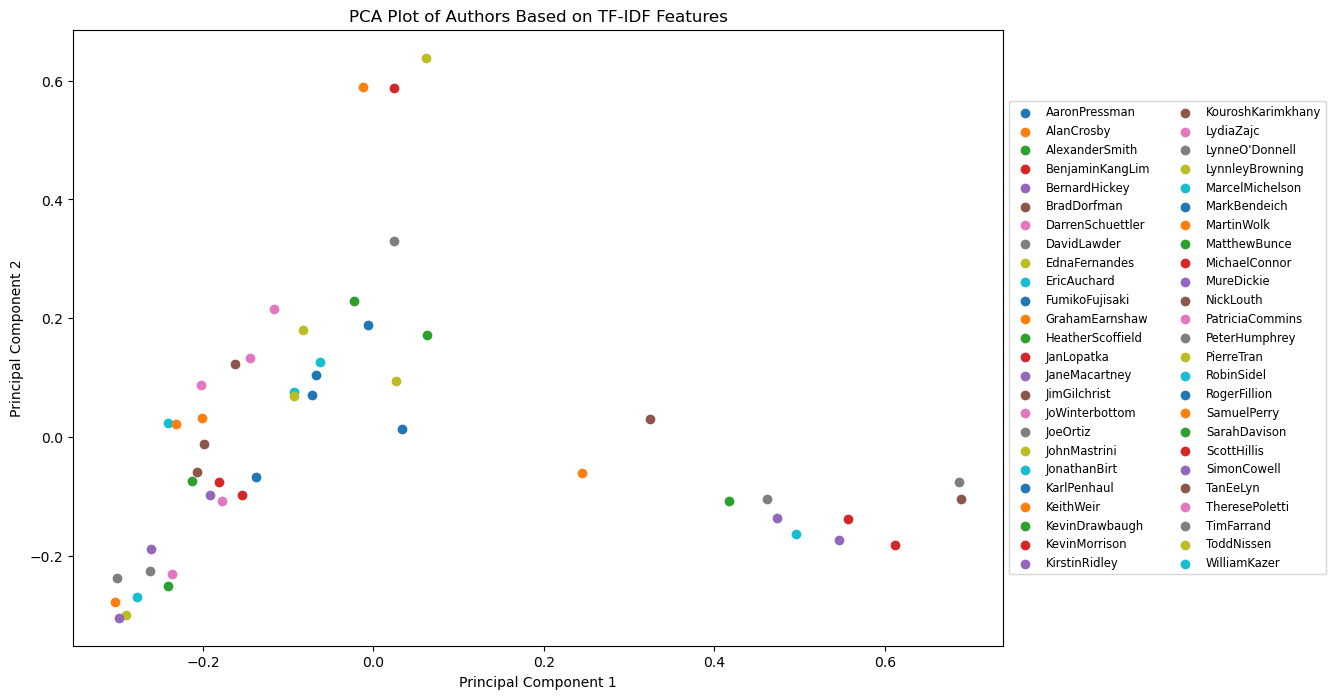

In [39]:
#Vectorize the words in the content

vectorizer = TfidfVectorizer(max_features=1000)
all_data_vect = vectorizer.fit_transform(all_data_text['Content'])

feature_names = vectorizer.get_feature_names_out()

#for index, word in enumerate(feature_names):
#    print(f"Index {index}: {word}")
#print(all_data_vect)   

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Number of principal components to keep
n_components = 5

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA on the TF-IDF data
pca_result = pca.fit_transform(all_data_vect.toarray())  # Convert sparse matrix to dense

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['Author'] = all_data_text['Folder']
#pca_df['Cluster'] = all_data_text['Cluster']

# Print the explained variance ratio
print(f"Explained Variance Ratio of PCs: {pca.explained_variance_ratio_}")

############

# Get the principal components
pcs = pca.components_

# Convert to DataFrame for easier readability
pcs_df = pd.DataFrame(pcs, columns=vectorizer.get_feature_names_out())

# Display the principal components
print("\n\nPrincipal Components (PCs):")

# Optionally, print specific principal components with the top contributing features
for i in range(pcs_df.shape[0]):
    print(f"\nPrincipal Component {i+1} - Top Contributing Features:")
    print(pcs_df.iloc[i].sort_values(ascending=False).head(10))  # Top 10 features for each PC

#for validation, checking PC ortho
# for i in range(pcs_df.shape[0]):
#     print(f"\nPrincipal Component {i+1} - Top Contributing Features:")
#     print(pcs_df.iloc[i].sort_values(ascending=True).head(10))  # Top 10 features for each PC

import matplotlib.pyplot as plt

# Assuming pca_df already contains the PCA results with 'PC1', 'PC2', and 'Author' columns

# Plot the first two principal components, colored by author
plt.figure(figsize=(12, 8))
authors = pca_df['Author'].unique()

for author in authors:
    subset = pca_df[pca_df['Author'] == author]
    plt.scatter(subset['PC1'], subset['PC2'], label=author)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)
plt.title('PCA Plot of Authors Based on TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()



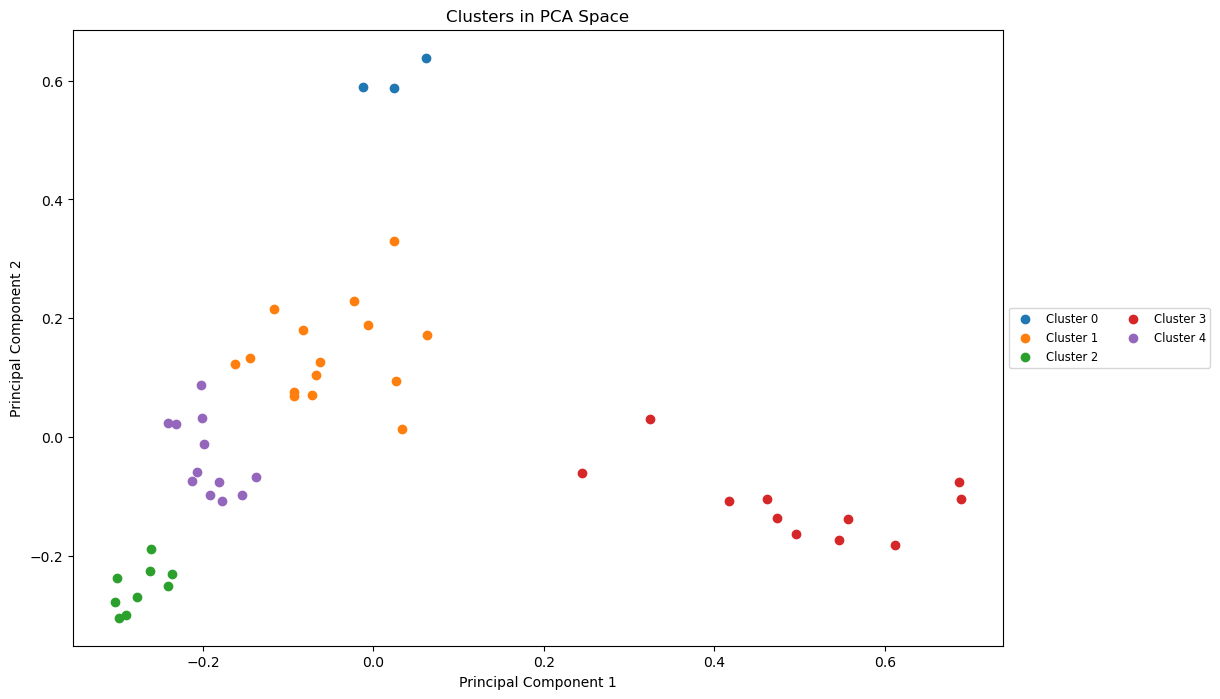

Cluster 0 contains the following authors:
['AlanCrosby', 'JanLopatka', 'JohnMastrini']


Cluster 1 contains the following authors:
['AaronPressman', 'DarrenSchuettler', 'DavidLawder', 'FumikoFujisaki', 'HeatherScoffield', 'KarlPenhaul', 'KouroshKarimkhany', 'LydiaZajc', 'LynnleyBrowning', 'MarcelMichelson', 'MatthewBunce', 'PierreTran', 'RobinSidel', 'RogerFillion', 'ToddNissen']


Cluster 2 contains the following authors:
['AlexanderSmith', 'EdnaFernandes', 'JoWinterbottom', 'JoeOrtiz', 'JonathanBirt', 'KeithWeir', 'KirstinRidley', 'SimonCowell', 'TimFarrand']


Cluster 3 contains the following authors:
['BenjaminKangLim', 'GrahamEarnshaw', 'JaneMacartney', 'JimGilchrist', "LynneO'Donnell", 'MureDickie', 'PeterHumphrey', 'SarahDavison', 'ScottHillis', 'TanEeLyn', 'WilliamKazer']


Cluster 4 contains the following authors:
['BernardHickey', 'BradDorfman', 'EricAuchard', 'KevinDrawbaugh', 'KevinMorrison', 'MarkBendeich', 'MartinWolk', 'MichaelConnor', 'NickLouth', 'PatriciaCommins', 'Sa

In [41]:
from sklearn.cluster import KMeans

# Assuming you already have pca_df with 'PC1' and 'PC2' from the PCA results

#Perform K-Means clustering on the PCA results

num_clusters = 5  # You can choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    subset = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f"Cluster {cluster}")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=2)
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Extract authors from each cluster
authors_by_cluster = pca_df.groupby('Cluster')['Author'].apply(list).reset_index()

# Display the authors in each cluster
for cluster in authors_by_cluster['Cluster'].unique():
    print(f"Cluster {cluster} contains the following authors:")
    print(authors_by_cluster[authors_by_cluster['Cluster'] == cluster]['Author'].values[0])
    print("\n")



In [43]:
#PCs    
for i in range(pcs_df.shape[0]):
    print(f"\nPrincipal Component {i+1} - Top Contributing Features:")
    print(pcs_df.iloc[i].sort_values(ascending=False).head(10))  # Top 10 features for each PC
    


Principal Component 1 - Top Contributing Features:
china      0.334521
hong       0.332305
chinese    0.320344
kong       0.263451
beijing    0.255229
chinas     0.223148
wang       0.163908
tung       0.103899
kongs      0.099576
taiwan     0.083718
Name: 0, dtype: float64

Principal Component 2 - Top Contributing Features:
czech        0.470809
prague       0.205491
klaus        0.184432
crowns       0.149294
senate       0.115565
gm           0.111785
coalition    0.101366
crown        0.084170
toronto      0.080261
brex         0.075241
Name: 1, dtype: float64

Principal Component 3 - Top Contributing Features:
internet     0.218602
software     0.216860
computer     0.199772
microsoft    0.187853
corp         0.147995
apple        0.143264
inc          0.138663
said         0.137756
quarter      0.135377
online       0.123593
Name: 2, dtype: float64

Principal Component 4 - Top Contributing Features:
hong      0.309797
kong      0.242007
gm        0.191982
cargo     0.133853
tung

### Q7: Association Rule Mining

In [2]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx

#Path to the groceries.txt file
path = '/Users/tomstarkie/Downloads/MSBA 2024/Intro to Machine Learning/Assignments/Data Files for Part 2/groceries.txt'

#Reading the file 
#reads in the code line by line and puts the line into a list of lists where each list represents a basket:
grocRaw = []
with open(path, 'r') as file:
    for line in file:
        if line.strip():  # Check if line is not empty
            grocRaw.append(line.strip().split(','))

grocRaw[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

In [4]:
#Pre-processing the data read in from the text file so we can use Apriori Algorithim 

#Preparing data for the DataFrame

#This section creates dictionaries with baskets and fills these 'baskets' with item. Looks like below: 
 # {'Basket': 1, 'Item': 'margarine'},
 # {'Basket': 1, 'Item': 'ready soups'},
 # {'Basket': 2, 'Item': 'tropical fruit'}
data = []
for i, transaction in enumerate(grocRaw, start=1):
    for item in transaction:
        data.append({'Basket': i, 'Item': item.strip()})

#Puts the list of dictionaries into a DataFrame
#converts basket column to a categorical datatype for processing as we don't want it to read it as an integer
dfBaskets = pd.DataFrame(data)
dfBaskets['Basket'] = dfBaskets['Basket'].astype('category')

# Splitting the items by basket and converting to a list of lists for Apriori
baskets = dfBaskets.groupby('Basket')['Item'].apply(list)
basketTransactions = baskets.tolist()

In [6]:
#Using the Apriori algorithm
from apyori import apriori
##Original
#shopping = list(apriori(basketTransactions, min_support=0.005, min_confidence=0.1, max_length=4))

shopping =  list(apriori(basketTransactions, min_support=0.01, min_confidence=0.025, max_length=8))

#Filtering the results with lift and cofidence

high_lift = [rule for rule in shopping if any(item.lift > 4 for item in rule.ordered_statistics)]
high_confidence = [rule for rule in shopping if any(item.confidence > 0.6 for item in rule.ordered_statistics)]
high_lift_and_confidence = [rule for rule in shopping if any(item.lift > 10 and item.confidence > 0.5 for item in rule.ordered_statistics)]

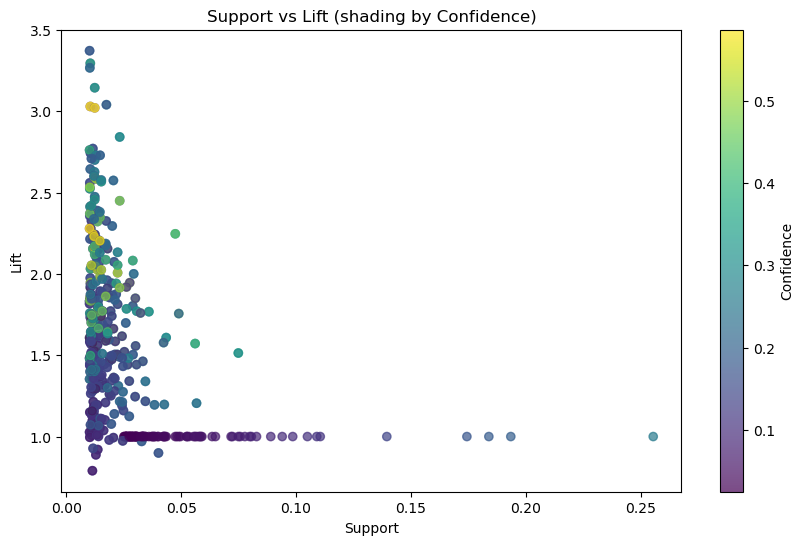

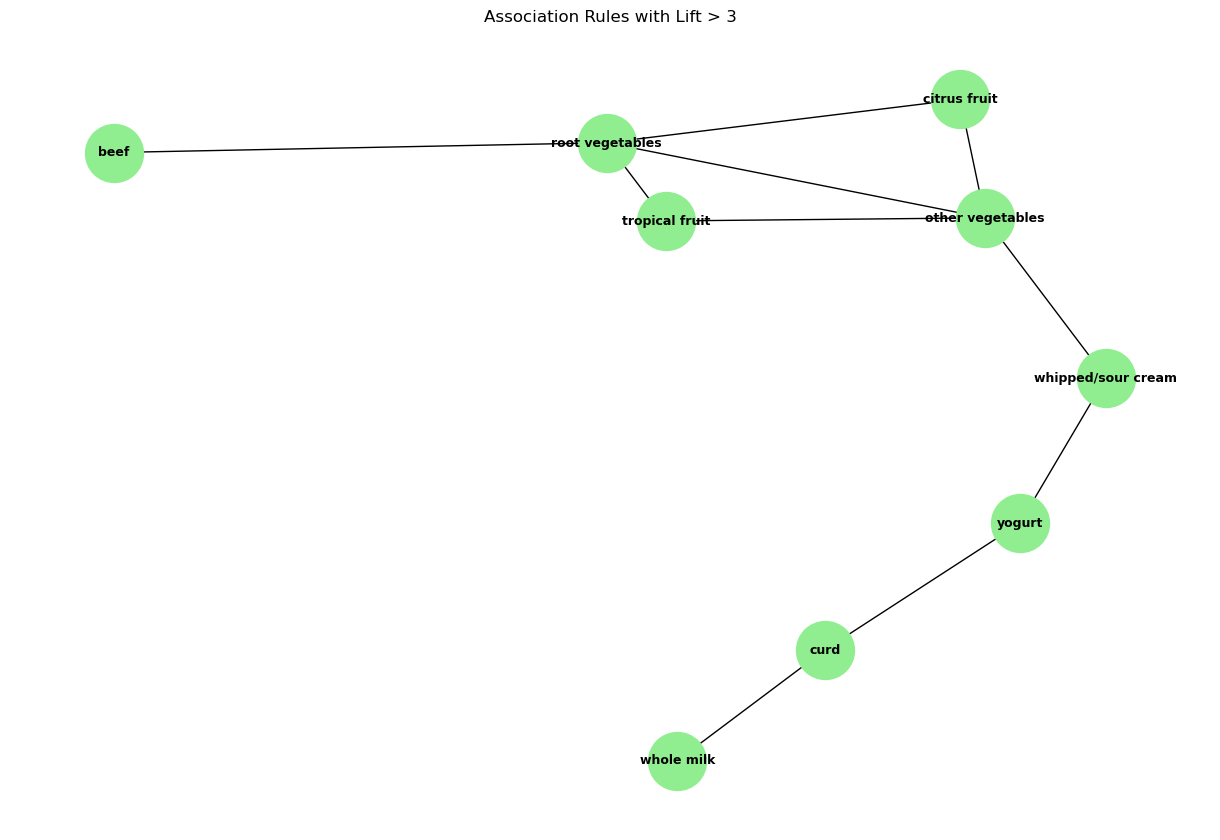

In [8]:
# Plotting results
plt.figure(figsize=(10, 6))
support_lift_confidence = [(rule.support, item.lift, item.confidence)
                           for rule in shopping
                           for item in rule.ordered_statistics]
support, lift, confidence = zip(*support_lift_confidence)
plt.scatter(support, lift, c=confidence, cmap='viridis', alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.colorbar(label='Confidence')
plt.title('Support vs Lift (shading by Confidence)')
plt.show()



#showing the association rules

G = nx.Graph()
for rule in shopping:
    for item in rule.ordered_statistics:
        if item.lift > 3:
            for base in item.items_base:
                for add in item.items_add:
                    G.add_edge(base, add)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, edge_color='k', linewidths=4, font_size=9, font_weight='bold')
plt.title('Association Rules with Lift > 3')
plt.show()

### Q8: Neural Networks

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import os
import requests
import zipfile
import matplotlib.pyplot as plt


##All this code grabs the dataset from URL, downloads it, and checks directory
#to make sure it exists. Also used chatgpt for help

# Define the URL and download location
url = "https://madm.dfki.de/files/sentinel/EuroSAT.zip"
output_zip = "./EuroSAT.zip"
output_dir = "./EuroSAT_RGB/"

# Download the dataset with SSL verification disabled
if not os.path.exists(output_zip):
    print("Downloading dataset...")
    response = requests.get(url, verify=False)  # Disable SSL verification
    with open(output_zip, 'wb') as f:
        f.write(response.content)
    print("Download completed.")

# Extract the dataset
if not os.path.exists(output_dir):
    print("Extracting dataset...")
    with zipfile.ZipFile(output_zip, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
    print("Extraction completed.")

# Check if the dataset directory exists and list the contents
if os.path.exists("./EuroSAT_RGB/"):
    print("Dataset directory exists. Listing contents:")
    print(os.listdir("./EuroSAT_RGB/"))
else:
    print("Dataset directory does not exist. Something went wrong.")


/Users/tomstarkie/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'madm.dfki.de'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Download completed.
Extracting dataset...
Extraction completed.
Dataset directory exists. Listing contents:
['2750']


In [12]:
# Define the root directory of your dataset
dataset_dir = "./EuroSAT_RGB/2750"

###used code from class but added some more to make each picture the same size
###and use each color

transform = transforms.Compose([
    transforms.Resize((64, 64)),  #resize images to 64x64
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  #normalize for RGB
])

#use ImageFolder class
dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

#train-test split (80/20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

#data loaders
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


In [14]:
##used code from class and added epochs section to help with accuracy

# Define the device to use for training (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)  # Adjust the number of output classes as needed

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


#add training epochs to increase accuracy
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    model.train()  # Set the model to training mode
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / (i+1):.4f}")

print('Finished Training')


Epoch 1/10, Loss: 1.1199
Epoch 2/10, Loss: 0.6789
Epoch 3/10, Loss: 0.5570
Epoch 4/10, Loss: 0.4808
Epoch 5/10, Loss: 0.3979
Epoch 6/10, Loss: 0.3376
Epoch 7/10, Loss: 0.2880
Epoch 8/10, Loss: 0.2437
Epoch 9/10, Loss: 0.2018
Epoch 10/10, Loss: 0.1652
Finished Training


In [15]:
##finds model accuracy

model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():  # Disable gradient calculation
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Test Set Accuracy: 88.07%


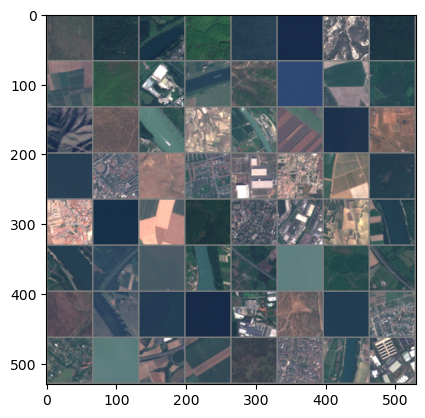

Predicted:  HerbaceousVegetation Forest River Forest Forest SeaLake Industrial Forest AnnualCrop Forest Industrial River HerbaceousVegetation SeaLake AnnualCrop River HerbaceousVegetation HerbaceousVegetation River PermanentCrop River AnnualCrop SeaLake PermanentCrop SeaLake Residential HerbaceousVegetation Residential Industrial Residential PermanentCrop Forest Highway SeaLake AnnualCrop Forest Residential Industrial PermanentCrop River River River SeaLake River Highway SeaLake Forest Highway HerbaceousVegetation River SeaLake SeaLake Industrial HerbaceousVegetation SeaLake Residential Residential SeaLake Highway AnnualCrop HerbaceousVegetation Residential River Industrial


In [16]:
#tests to see if it worked. Code also from class

# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images with predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images
imshow(torchvision.utils.make_grid(images))
print('Predicted: ', ' '.join(f'{dataset.classes[predicted[j]]}' for j in range(len(images))))


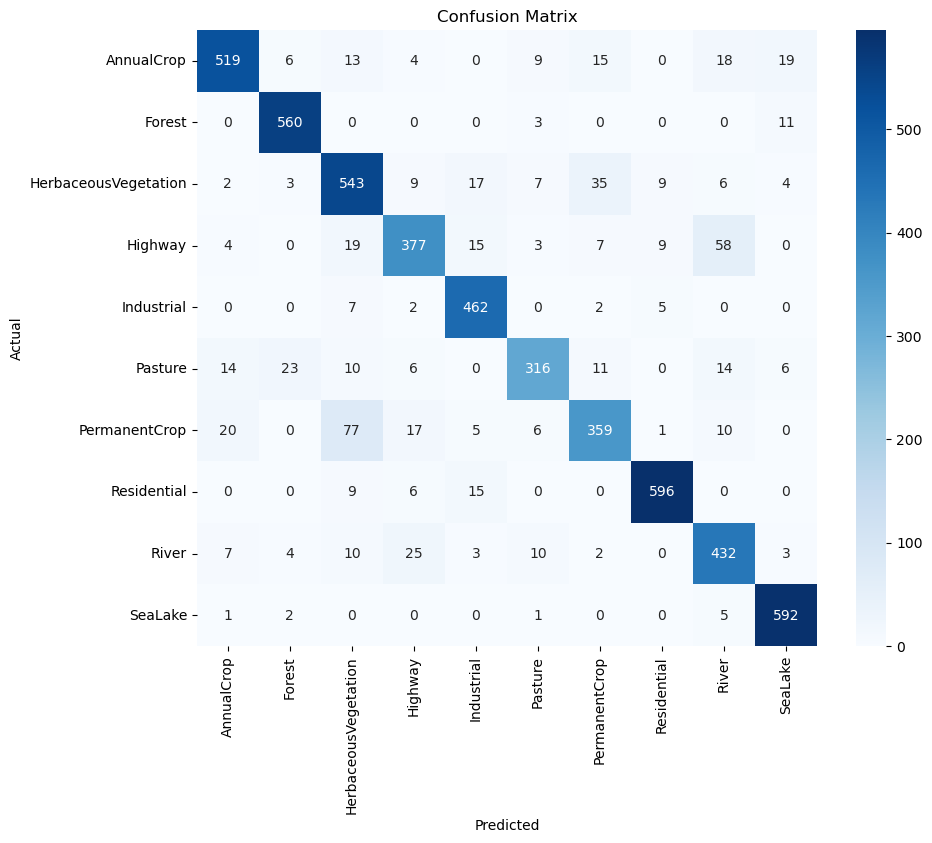

In [17]:
#make a confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


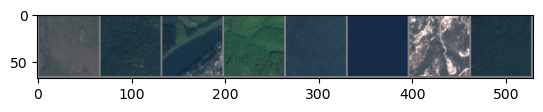

Actual:     HerbaceousVegetation Forest          River           Forest          Forest          SeaLake         HerbaceousVegetation Forest         
Predicted:  HerbaceousVegetation Forest          River           Forest          Forest          SeaLake         Industrial      Forest         


In [18]:
##Used chatgpt for help - outputs sample predicted vs actual 

# Function to unnormalize and show images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image (assuming normalization was done with mean=0.5 and std=0.5)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images and their labels
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict the labels using the trained model
model.eval()  # Set the model to evaluation mode
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images
imshow(torchvision.utils.make_grid(images[:8]))  # Display the first 8 images in the batch

# Print actual and predicted labels
print('Actual:    ', ' '.join(f'{dataset.classes[labels[j]]:15s}' for j in range(8)))
print('Predicted: ', ' '.join(f'{dataset.classes[predicted[j]]:15s}' for j in range(8)))
